In [163]:
from astroquery.sdss import SDSS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

In [164]:
query = """
SELECT 
  p.objID AS ID,
  p.petroMag_r AS m_r, p.petroMag_u AS m_u, p.petroMag_g AS m_g,
  s.z AS z,
  z.p_el AS E, z.p_cs AS S
FROM PhotoObjAll AS p, SpecObjAll AS s, zooVotes AS z
WHERE s.bestObjID = p.ObjID
  AND z.ObjID     = p.ObjID
  AND s.class     = 'GALAXY'
  AND p.mode      = 1
  AND (z.p_el > 0.8 OR z.p_cs > 0.8)
  AND p.petroMag_r > -50
  AND p.petroMag_u > -50 AND p.petroMag_u < 22
  AND p.petroMag_g > -50
"""

# Ejecuta contra SkyServer (elige DR17)
tbl = SDSS.query_sql(query, data_release=17) 

# Guarda a CSV
df = tbl.to_pandas()
df.to_csv("sdss_galaxias_tp3.csv", index=False)
print(df.shape, "filas guardadas en sdss_galaxias_tp3.csv")

# Leemos el CSV
df=pd.read_csv("sdss_galaxias_tp3.csv",sep=',')
df


(275174, 7) filas guardadas en sdss_galaxias_tp3.csv


,ID,m_r,m_u,m_g,z,E,S
0,1237652943703638346,17.54927,19.80840,18.51687,-0.008778,0.921,0.026
1,1237661950792040719,15.58589,17.91881,16.30349,-0.001777,0.857,0.048
2,1237663916812468282,16.29487,17.04387,16.56665,-0.000031,0.967,0.000
3,1237661950790991908,13.08130,21.79780,13.90718,0.000841,0.000,1.000
4,1237661357007437896,17.81264,17.07006,17.29877,0.001451,0.057,0.857
...,...,...,...,...,...,...,...
275169,1237654954279961653,19.11767,20.93527,20.79542,0.410230,0.845,0.069
275170,1237661849849954454,17.59639,20.06020,19.07832,0.252996,0.843,0.091
275171,1237674602142433582,17.91338,20.03612,19.45646,0.278615,0.815,0.000
275172,1237661873468736252,18.43138,20.53330,19.88948,0.376768,0.800,0.040


## **PROBLEMA 2**

Estudie la distribución de  ́ındices de color g-r y u-g para galaxias elípticas y espirales. Determinar si para ambos casos las distribuciones son consistentes. Discuta la validez de la forma de la distribución propuesta para el estadístico de la prueba.

In [165]:
#Agrego los indices de color a la tabla para su posterior analisis.
df["g-r"]=df["m_g"]-df["m_r"]
df["u-g"]=df["m_u"] -df["m_g"]
df

,ID,m_r,m_u,m_g,z,E,S,g-r,u-g
0,1237652943703638346,17.54927,19.80840,18.51687,-0.008778,0.921,0.026,0.96760,1.29153
1,1237661950792040719,15.58589,17.91881,16.30349,-0.001777,0.857,0.048,0.71760,1.61532
2,1237663916812468282,16.29487,17.04387,16.56665,-0.000031,0.967,0.000,0.27178,0.47722
3,1237661950790991908,13.08130,21.79780,13.90718,0.000841,0.000,1.000,0.82588,7.89062
4,1237661357007437896,17.81264,17.07006,17.29877,0.001451,0.057,0.857,-0.51387,-0.22871
...,...,...,...,...,...,...,...,...,...
275169,1237654954279961653,19.11767,20.93527,20.79542,0.410230,0.845,0.069,1.67775,0.13985
275170,1237661849849954454,17.59639,20.06020,19.07832,0.252996,0.843,0.091,1.48193,0.98188
275171,1237674602142433582,17.91338,20.03612,19.45646,0.278615,0.815,0.000,1.54308,0.57966
275172,1237661873468736252,18.43138,20.53330,19.88948,0.376768,0.800,0.040,1.45810,0.64382


In [166]:
# Distinguo entre elípticas y espirales.
ellipticals = df[df['E']>0.8]
spirals = df[df['S']>0.8]

In [167]:
ellipticals

,ID,m_r,m_u,m_g,z,E,S,g-r,u-g
0,1237652943703638346,17.54927,19.80840,18.51687,-0.008778,0.921,0.026,0.96760,1.29153
1,1237661950792040719,15.58589,17.91881,16.30349,-0.001777,0.857,0.048,0.71760,1.61532
2,1237663916812468282,16.29487,17.04387,16.56665,-0.000031,0.967,0.000,0.27178,0.47722
6,1237661950255169580,12.03967,14.65109,12.81238,0.001794,1.000,0.000,0.77271,1.83871
19,1237661976547491868,13.05498,15.36976,13.78526,0.004013,0.959,0.021,0.73028,1.58450
...,...,...,...,...,...,...,...,...,...
275169,1237654954279961653,19.11767,20.93527,20.79542,0.410230,0.845,0.069,1.67775,0.13985
275170,1237661849849954454,17.59639,20.06020,19.07832,0.252996,0.843,0.091,1.48193,0.98188
275171,1237674602142433582,17.91338,20.03612,19.45646,0.278615,0.815,0.000,1.54308,0.57966
275172,1237661873468736252,18.43138,20.53330,19.88948,0.376768,0.800,0.040,1.45810,0.64382


In [168]:
spirals

,ID,m_r,m_u,m_g,z,E,S,g-r,u-g
3,1237661950790991908,13.08130,21.79780,13.90718,0.000841,0.000,1.000,0.82588,7.89062
4,1237661357007437896,17.81264,17.07006,17.29877,0.001451,0.057,0.857,-0.51387,-0.22871
5,1237661357007437896,17.81264,17.07006,17.29877,0.001501,0.057,0.857,-0.51387,-0.22871
7,1237658492281028625,12.43659,14.49875,13.13393,0.002058,0.155,0.810,0.69734,1.36482
8,1237662195058147399,12.72443,14.29871,13.18944,0.002344,0.014,0.919,0.46501,1.10927
...,...,...,...,...,...,...,...,...,...
274541,1237668271907995907,15.84502,17.87660,16.44271,0.000000,0.000,1.000,0.59769,1.43389
274545,1237661968496984224,14.52828,16.77247,15.22356,0.721372,0.056,0.939,0.69528,1.54891
274546,1237652944767615331,15.58396,17.80306,16.14725,0.782631,0.013,0.923,0.56329,1.65581
274547,1237659150995554387,17.31003,19.60526,17.91442,0.852988,0.094,0.875,0.60439,1.69084


# (G - R)

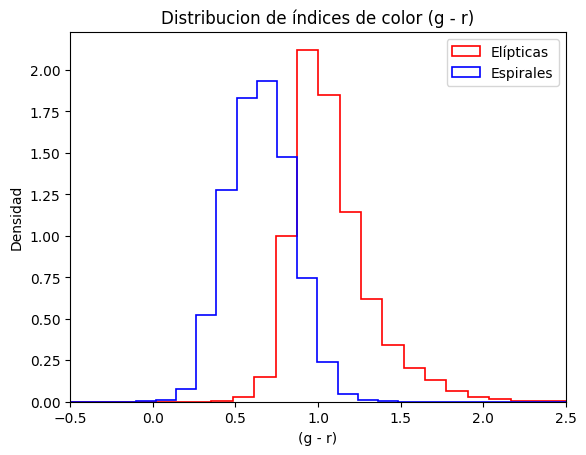

In [169]:
# Distribucion (g-r) para elipticas y para espirales.
color_gr_ell = ellipticals['g-r']
color_gr_sp = spirals['g-r']

#Hago el grafico distinguiendo entre elipticas y espirales.
h=plt.hist(color_gr_ell, bins=150, density=True, histtype='step', color='red', linewidth=1.2, label='Elípticas')
plt.hist(color_gr_sp, bins=150, density=True, histtype='step', color='blue', linewidth=1.2, label='Espirales')
plt.xlim(-0.5, 2.5)
plt.xlabel('(g - r)')
plt.ylabel('Densidad')
plt.title('Distribucion de índices de color (g - r)')
plt.legend(loc='best')
plt.show()


In [ ]:
# Lo siguiente sirve para calcular las funciones acumuladas.
# Ordeno y preparo las funciones acumuladas (CDF)
gr_sp_sorted = color_gr_sp.sort_values().reset_index(drop=True)
gr_ell_sorted = color_gr_ell.sort_values().reset_index(drop=True)
cdf_sp = np.arange(1, len(gr_sp_sorted)+1) / len(gr_sp_sorted)
cdf_ell = np.arange(1, len(gr_ell_sorted)+1) / len(gr_ell_sorted)

print(f"Longitud espirales: {len(gr_sp_sorted)}")
print(f"Longitud elípticas: {len(gr_ell_sorted)}")

Longitud espirales: 94896
Longitud elípticas: 180278


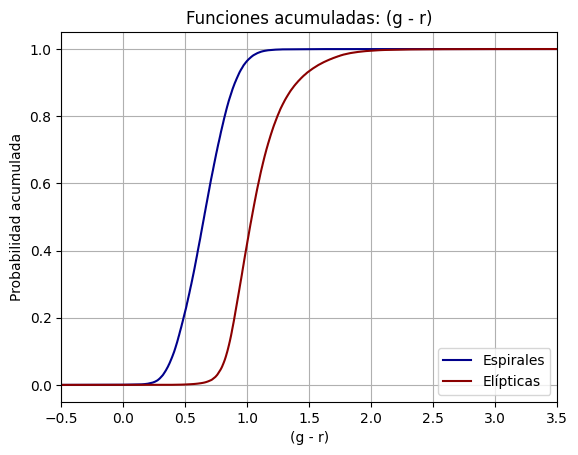

In [171]:
# Grafico las funciones acumuladas
# (g - r)
plt.plot(gr_sp_sorted, cdf_sp, color='darkblue', label='Espirales')
plt.plot(gr_ell_sorted, cdf_ell, color='darkred', label='Elípticas')
plt.xlabel('(g - r)')
plt.ylabel('Probabilidad acumulada')
plt.xlim(-0.5, 3.5)
plt.title('Funciones acumuladas: (g - r)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Realizo el test KS
# Se elije una muestra aleatoria del mismo tamaño que las espirales
# porque el test KS necesita dos distribuciones del mismo tamaño
# Usar len(color_gr_sp) me devuelve el tamaño de la muestra de espirales

# Tomo una muestra aleatoria de la distribución de elípticas 
color_gr_ell_sample = np.random.choice(color_gr_ell, size=len(color_gr_sp))

# Luego usar la muestra en el test KS
ks_statistic, p_value = stats.ks_2samp(color_gr_sp, color_gr_ell_sample)
print("Valor de estadística KS:", ks_statistic)
print("Valor p:", "{:e}".format(p_value))

Valor de estadística KS: 0.7301783004552351
Valor p: 0.000000e+00


# (U - G)

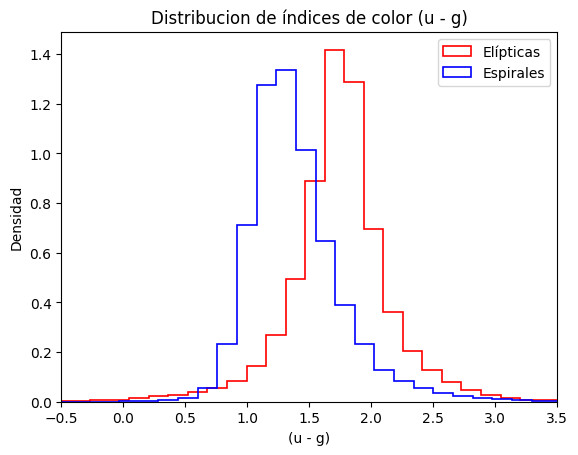

Longitud espirales: 94896
Longitud elípticas: 180278


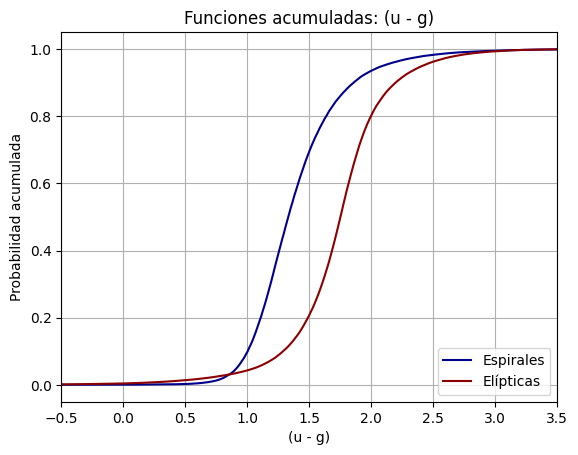

Valor de estadística KS: 0.4889036418816388
Valor p: 0.000000e+00


In [ ]:
# Distribucion (u-g) para elipticas y para espirales.
color_ug_ell = ellipticals['u-g']
color_ug_sp = spirals['u-g']

#Hago el grafico distinguiendo entre elipticas y espirales.
# (u - g)
h=plt.hist(color_ug_ell, bins=150, density=True, histtype='step', color='red', linewidth=1.2, label='Elípticas')
plt.hist(color_ug_sp, bins=150, density=True, histtype='step', color='blue', linewidth=1.2, label='Espirales')
plt.xlim(-0.5, 3.5)
plt.xlabel('(u - g)')
plt.ylabel('Densidad')
plt.title('Distribucion de índices de color (u - g)')
plt.legend(loc='best')
plt.show()


# Lo siguiente sirve para calcular las funciones acumuladas
# Ordeno y preparo las funciones acumuladas (CDF)
ug_sp_sorted = color_ug_sp.sort_values().reset_index(drop=True)
ug_ell_sorted = color_ug_ell.sort_values().reset_index(drop=True)
cdf_sp = np.arange(1, len(ug_sp_sorted)+1) / len(ug_sp_sorted)
cdf_ell = np.arange(1, len(ug_ell_sorted)+1) / len(ug_ell_sorted)

print(f"Longitud espirales: {len(ug_sp_sorted)}")
print(f"Longitud elípticas: {len(ug_ell_sorted)}")


# Grafico las funciones acumuladas
# (u - g)
plt.plot(ug_sp_sorted, cdf_sp, color='darkblue', label='Espirales')
plt.plot(ug_ell_sorted, cdf_ell, color='darkred', label='Elípticas')
plt.xlabel('(u - g)')
plt.ylabel('Probabilidad acumulada')
plt.xlim(-0.5, 3.5)
plt.title('Funciones acumuladas: (u - g)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Realizo el test KS
# Se elije una muestra aleatoria del mismo tamaño que las espirales
# porque el test KS necesita dos distribuciones del mismo tamaño
# Usar len(color_ug_sp) me devuelve el tamaño de la muestra de espirales

# Tomo una muestra aleatoria de la distribución de elípticas 
color_ug_ell_sample = np.random.choice(color_ug_ell, size=len(color_ug_sp))

# Luego usar la muestra en el test KS
ks_statistic, p_value = stats.ks_2samp(color_ug_sp, color_ug_ell_sample)
print("Valor de estadística KS:", ks_statistic)
print("Valor p:", "{:e}".format(p_value))

## **PROBLEMA 3**

Estudie la distribución de tipos morfológicos y determine si la misma es consistente con una distribución uniforme.

In [174]:
#Distingo entre elipticas y espirales para distintos valores de corte.
#Desde 0.7, 0.9 y 1, poniendo el mismo limite para ambos tipos.

n_e=df[df['E']==1]
n_s=df[df['S']==1]

n_e1=df[df['E']>0.9]
n_s1=df[df['S']>0.9]


n_e2=df[df['E']>0.7]
n_s2=df[df['S']>0.7]



In [175]:
print('para un corte de 1 tengo',len(n_e),'galaxias elipticas y',len(n_s),'galaxias espirales')
print('para un corte de 0.9 tengo',len(n_e1),'galaxias elipticas y',len(n_s1),'galaxias espirales')
print('para un corte de 0.7 tengo',len(n_e2),'galaxias elipticas y',len(n_s2),'galaxias espirales')


para un corte de 1 tengo 3740 galaxias elipticas y 9558 galaxias espirales
para un corte de 0.9 tengo 47307 galaxias elipticas y 51699 galaxias espirales
para un corte de 0.7 tengo 180278 galaxias elipticas y 94896 galaxias espirales


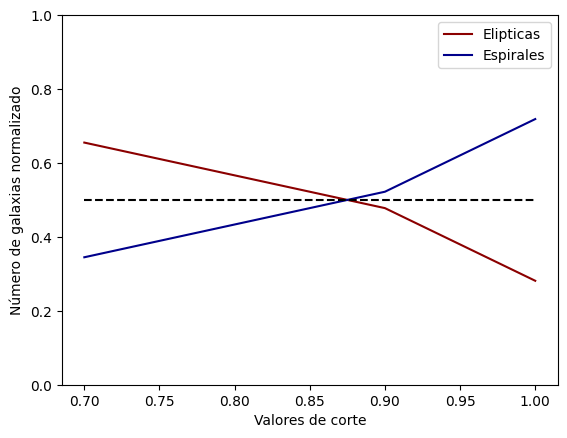

In [176]:
#Preparo los datos para graficar los resultados
x=[0.7,0.9,1]
ye=[len(n_e2)/(len(n_e2)+len(n_s2)),len(n_e1)/(len(n_e1)+len(n_s1)),len(n_e)/(len(n_e)+len(n_s))]
ys=[len(n_s2)/(len(n_e2)+len(n_s2)),len(n_s1)/(len(n_e1)+len(n_s1)),len(n_s)/(len(n_e)+len(n_s))]

ym=[0.5,0.5,0.5]

plt.plot(x,ye,label='Elipticas',color='darkred')
plt.plot(x,ys,label='Espirales',color='darkblue')
plt.plot(x,ym,color='black',linestyle='--')
plt.ylim(0,1)
plt.xlabel('Valores de corte')
plt.ylabel('Número de galaxias normalizado')
plt.legend()
plt.show()

In [177]:
# Calculo las frecuencias para los distintos cortes
freq_expected = 0.5

freq2_sp = len(n_s2)/(len(n_e2)+len(n_s2))
freq2_el = len(n_e2)/(len(n_e2)+len(n_s2))

freq1_sp = len(n_s1)/(len(n_e1)+len(n_s1))
freq1_el = len(n_e1)/(len(n_e1)+len(n_s1))

freq_sp = len(n_s)/(len(n_e)+len(n_s))
freq_el = len(n_e)/(len(n_e)+len(n_s))

In [178]:
# Ahora comparo ambas distribuciones con el chi cuadrado usando las frecuencias renombradas

chi = ((freq2_el - freq_expected)**2/freq_expected) + ((freq2_sp - freq_expected)**2/freq_expected)
f = st.chi2.cdf(chi, 1)
p = 1 - f
print('el chi2 para un corte de 0.7 es de', chi, 'y el p-value es de', p)

chi = ((freq1_el - freq_expected)**2/freq_expected) + ((freq1_sp - freq_expected)**2/freq_expected)
f = st.chi2.cdf(chi, 1)
p = 1 - f
print('el chi2 para un corte de 0.9 es de', chi, 'y el p-value es de', p)

chi = ((freq_el - freq_expected)**2/freq_expected) + ((freq_sp - freq_expected)**2/freq_expected)
f = st.chi2.cdf(chi, 1)
p = 1 - f
print('el chi2 para un corte de 1 es de', chi, 'y el p-value es de', p)

el chi2 para un corte de 0.7 es de 0.09627595900657368 y el p-value es de 0.7563452443784292
el chi2 para un corte de 0.9 es de 0.0019678936916080227 y el p-value es de 0.9646166901099187
el chi2 para un corte de 1 es de 0.19141447500939904 y el p-value es de 0.6617419605536417


## **PROBLEMA 4**

Grafique las magnitudes aparentes de galaxias en la banda r en función de las magnitudes en la banda g, y
obtenga un ajuste para la relación entre ambas.

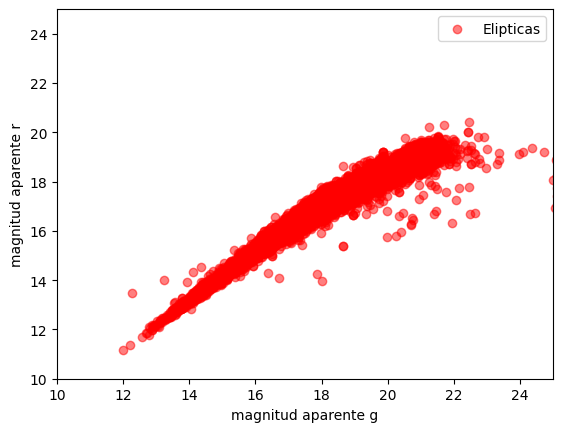

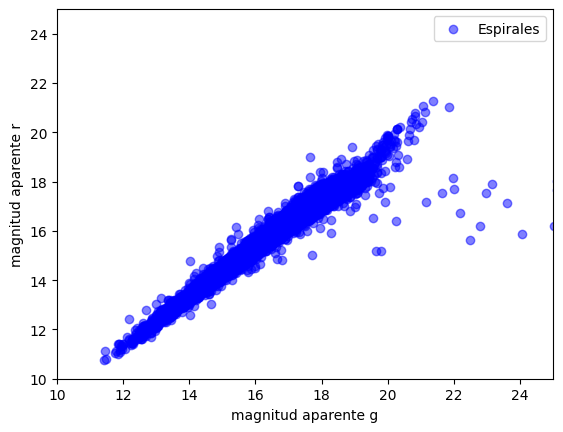

In [179]:
# Distincion entre elipticas y espirales
mg_ell = ellipticals['m_g']
mg_sp = spirals['m_g']

mr_ell = ellipticals['m_r']
mr_sp = spirals['m_r']

plt.scatter(mg_ell,mr_ell,label='Elipticas',color='red', alpha=0.5)
plt.xlabel('magnitud aparente g')
plt.ylabel('magnitud aparente r')
plt.legend()
plt.xlim(10,25)
plt.ylim(10,25)
plt.show()

plt.scatter(mg_sp,mr_sp,label='Espirales',color='blue', alpha=0.5)
plt.xlabel('magnitud aparente g')
plt.ylabel('magnitud aparente r')
plt.legend()
plt.xlim(10,25)
plt.ylim(10,25)
plt.show()

Viendo la tendencia de los datos en los graficos, vemos que se le puede ajustar una recta en ambos casos.
Para realizar el ajuste de una recta se usa el método de regresión lineal. 

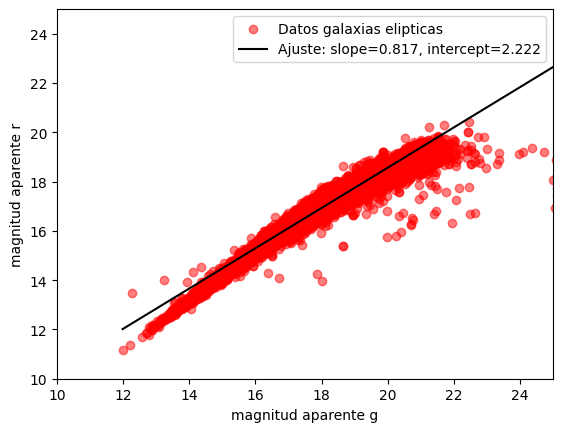

Slope: 0.8171046815976238
Intercept: 2.2217753714180226


In [180]:
# Ahora hay que hacer un ajuste lineal a cada uno de los graficos
# empezamos con las elipticas

# Realizo la regresion  lineal
slope, intercept = np.polyfit(mg_ell, mr_ell, 1)

# Creo la funcion para la regresion lineal 
regression_line = slope * mg_ell + intercept

# Ordeno por mg_ell para plotear la línea correctamente
idx = np.argsort(mg_ell)

# Grafico de los datos y el ajuste
plt.scatter(mg_ell, mr_ell, label='Datos galaxias elipticas', color='red',alpha=0.5)
plt.plot(mg_ell.iloc[idx], regression_line.iloc[idx], label=f"Ajuste: slope={slope:.3f}, intercept={intercept:.3f}", color='black')
plt.xlabel('magnitud aparente g')
plt.ylabel('magnitud aparente r')
plt.xlim(10,25)
plt.ylim(10,25) 
plt.legend()
plt.show()

#Printeamos los coeficientes de la recta
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


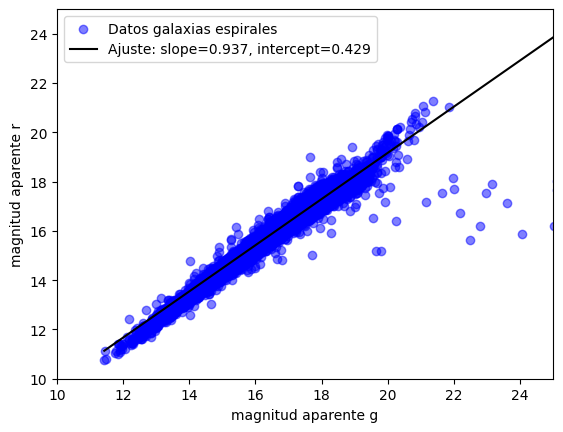

Slope: 0.9368586835328993
Intercept: 0.4285696354328427


In [181]:
# Ahora para la espirales

# Realizo la regresion  lineal
slope, intercept = np.polyfit(mg_sp, mr_sp, 1)

# Creo la funcion para la regresion lineal
regression_line = slope * mg_sp + intercept

# Ordeno por mg_sp para plotear la línea correctamente
idx = np.argsort(mg_sp)

#Grafico 
plt.scatter(mg_sp, mr_sp, label='Datos galaxias espirales', color='blue',alpha=0.5)
plt.plot(mg_sp.iloc[idx], regression_line.iloc[idx], label=f"Ajuste: slope={slope:.3f}, intercept={intercept:.3f}", color='black')
plt.xlabel('magnitud aparente g')
plt.ylabel('magnitud aparente r')
plt.xlim(10,25)
plt.ylim(10,25)
plt.legend()
plt.show()

#Printeamos los coeficientes de la recta
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

## **PROBLEMA 5**

Calcule la magnitud absoluta para cada galaxia, usando la aproximación:

$M = m − 25 − 5log10(\frac{c.z}{H})$


donde c es la velocidad de la luz y H = 75. Grafique la magnitud absoluta vs. el redshift para
todas las galaxias con mr < 17.5, y obtenga un ajuste para la envolvente de los puntos.
Discuta en el informe el origen de la forma de los puntos y el procedimiento para el ajuste del modelo.

En este apartado se analiza la relación entre la magnitud absoluta $M_r$ y el corrimiento al rojo $z$ para la muestra con $m_r < 17.5$ y $0.0 < z < 0.15$.
La elección de este rango en $z$ se debe a que, para valores mayores, los objetos detectados probablemente no correspondan a galaxias.

Además, el catálogo utilizado garantiza que, para magnitudes aparentes $r < 17.5$, los objetos observados son efectivamente galaxias.

In [182]:
#Restringo la muestra a las galaxias con m_r<17.5 y 0<z<0.15
sub_muestra = df[df['m_r']<17.5]
sub_muestra = sub_muestra[sub_muestra['z']>0.0]
sub_muestra = sub_muestra[sub_muestra['z']<0.15]
sub_muestra

,ID,m_r,m_u,m_g,z,E,S,g-r,u-g
3,1237661950790991908,13.08130,21.79780,13.90718,0.000841,0.000,1.000,0.82588,7.89062
6,1237661950255169580,12.03967,14.65109,12.81238,0.001794,1.000,0.000,0.77271,1.83871
7,1237658492281028625,12.43659,14.49875,13.13393,0.002058,0.155,0.810,0.69734,1.36482
8,1237662195058147399,12.72443,14.29871,13.18944,0.002344,0.014,0.919,0.46501,1.10927
9,1237661974399483956,13.30097,14.70543,13.72925,0.002458,0.002,0.988,0.42828,0.97618
...,...,...,...,...,...,...,...,...,...
274418,1237671932283453497,17.13110,21.09112,18.23474,0.071016,0.800,0.086,1.10364,2.85638
274420,1237662194004132036,16.40593,19.28435,17.41997,0.110857,0.923,0.033,1.01404,1.86438
274422,1237656495640019332,17.04533,18.83697,17.69880,0.123910,0.032,0.962,0.65347,1.13817
274424,1237648704589529314,17.19326,20.20301,18.35566,0.149854,0.872,0.043,1.16240,1.84735


In [183]:
# Constantes c y H. Usamos c en km/s y H en km/s/Mpc

c = 300000
H = 75

# Defino una función para calcular Mr
def magnitudabsoluta(row):
    return row["m_r"] - 25 - 5 * math.log10((c * row["z"]) / H)


# Aplica la función a cada fila del DataFrame
sub_muestra["Mr"] = sub_muestra.apply(magnitudabsoluta, axis=1)

In [184]:
sub_muestra

,ID,m_r,m_u,m_g,z,E,S,g-r,u-g,Mr
3,1237661950790991908,13.08130,21.79780,13.90718,0.000841,0.000,1.000,0.82588,7.89062,-14.551701
6,1237661950255169580,12.03967,14.65109,12.81238,0.001794,1.000,0.000,0.77271,1.83871,-17.239349
7,1237658492281028625,12.43659,14.49875,13.13393,0.002058,0.155,0.810,0.69734,1.36482,-17.140781
8,1237662195058147399,12.72443,14.29871,13.18944,0.002344,0.014,0.919,0.46501,1.10927,-17.136004
9,1237661974399483956,13.30097,14.70543,13.72925,0.002458,0.002,0.988,0.42828,0.97618,-16.662472
...,...,...,...,...,...,...,...,...,...,...
274418,1237671932283453497,17.13110,21.09112,18.23474,0.071016,0.800,0.086,1.10364,2.85638,-20.135966
274420,1237662194004132036,16.40593,19.28435,17.41997,0.110857,0.923,0.033,1.01404,1.86438,-21.828180
274422,1237656495640019332,17.04533,18.83697,17.69880,0.123910,0.032,0.962,0.65347,1.13817,-21.430507
274424,1237648704589529314,17.19326,20.20301,18.35566,0.149854,0.872,0.043,1.16240,1.84735,-21.695380


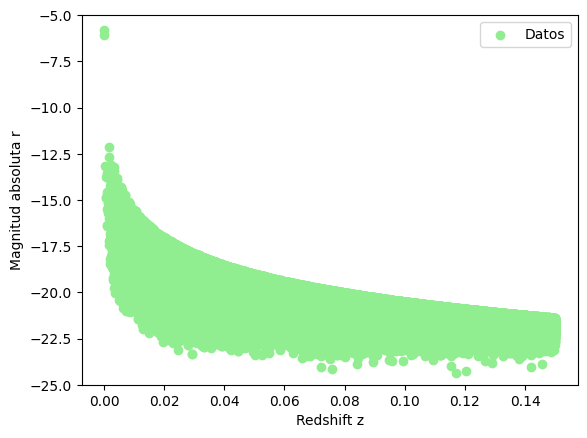

In [185]:
Mr=sub_muestra['Mr']
z=sub_muestra['z']
plt.scatter(z,Mr,color='lightgreen',label='Datos')
plt.xlabel('Redshift z')
plt.ylabel('Magnitud absoluta r')
plt.ylim(-25,-5)
plt.legend()
plt.show()

Para realizar el ajuste es necesario considerar únicamente los puntos que definen la envolvente del gráfico, ya que representan el límite superior de la distribución.
Por lo tanto, el primer paso consiste en construir un nuevo conjunto de datos que contenga esos valores característicos.

Para ello se utilizó la función binned_statistic del módulo scipy.stats, la cual divide el eje x en intervalos (bins) de tamaño definido y calcula, dentro de cada uno, un estadístico específico sobre los valores de y.
Esta herramienta permite obtener, por ejemplo, el valor máximo o medio de una variable en cada intervalo, lo que resulta útil para extraer la envolvente del conjunto de puntos.

La función devuelve:

bin_means: el valor estadístico calculado para cada bin.

bin_edges: los límites de los intervalos utilizados.

En este trabajo se empleó el estadístico 'max' para obtener, en cada intervalo de redshift, la magnitud absoluta más brillante, definiendo así los puntos que delinean la envolvente sobre la cual se realiza el ajuste.



In [ ]:

binned_res = st.binned_statistic(z, Mr, statistic='max', bins=50)
env_mag = binned_res[0]  # máximos por bin (envolvente)
bin_edges = binned_res[1]

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

valid_mask = ~np.isnan(env_mag)
env_mag = env_mag[valid_mask]
bin_centers = bin_centers[valid_mask]

In [187]:
print(len(env_mag))
print(len(bin_centers))

50
50


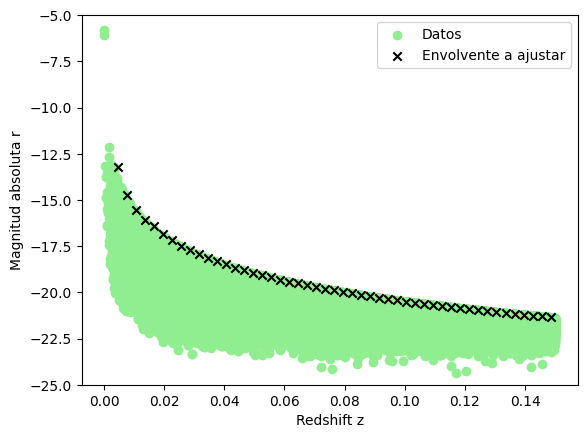

In [188]:
# Grafico envolvente para ajuste de los puntos
plt.scatter(z, Mr, color='lightgreen', label='Datos')
plt.scatter(bin_centers, env_mag, marker='x', color='black', label='Envolvente a ajustar')
plt.xlabel('Redshift z')
plt.ylabel('Magnitud absoluta r')
plt.ylim(-25, -5)
plt.legend()
plt.show()

Para realizar el ajuste de la envolvente, se utilizó la biblioteca SciPy.interpolate, que incluye la función UnivariateSpline.
Esta función ajusta un conjunto arbitrario de puntos, proporcionando una curva suave que describe adecuadamente la tendencia general de los datos.

En este caso, la spline se aplicó a los puntos obtenidos previamente con binned_statistic, es decir, a los valores que representan la magnitud absoluta máxima en cada intervalo de redshift.
De esta forma se obtiene una curva continua que modela la envolvente superior del diagrama Mr vs z, correspondiente al límite de magnitud impuesto por el relevamiento.

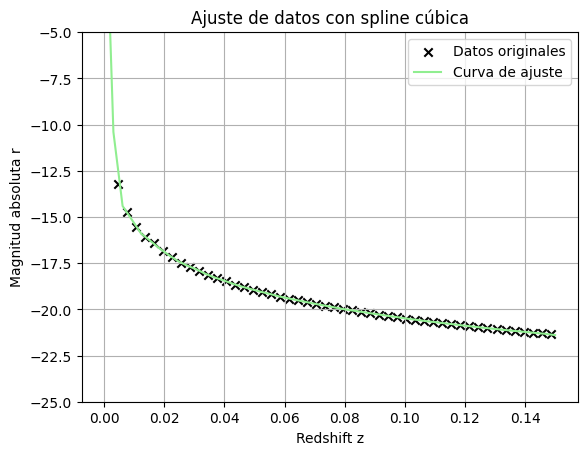

In [ ]:
#Los datos a ajustar son las cruces. 
from scipy.interpolate import UnivariateSpline


# Crear la spline cúbica
spline = UnivariateSpline(bin_centers, env_mag, k=3, s=0)

# Generar puntos para la curva ajustada
x_spline = np.linspace(0, 0.15, 50)
y_spline = spline(x_spline)

# Graficar los datos originales y la spline ajustada
plt.scatter(bin_centers, env_mag, label='Datos originales', color='black', marker='x')
plt.plot(x_spline, y_spline, label='Curva de ajuste', color='lightgreen')
plt.legend()
plt.xlabel('Redshift z')
plt.ylabel('Magnitud absoluta r')
plt.ylim(-25,-5)
plt.title('Ajuste de datos con spline cúbica')
plt.grid(True)
plt.show()
